## Unsupervised Learning Final Project: Children Mortality Clustering

### Dataset from KAGGLE: `https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?resource=download`

### DATASET Content (Column Name: Description) 

167 Rows x 10 Features

1. ``country``: Name of the country `Unique values, columns dropped in the process`
2. ``child_mort``: Death of children under 5 years of age per 1000 live births
3. ``exports``: Exports of goods and services per capita. Given as %age of the GDP per capita
4. ``health``: Total health spending per capita. Given as %age of GDP per capita
5. ``imports``: Imports of goods and services per capita. Given as %age of the GDP per capita
6. ``Income``: Net income per person
7. ``Inflation``: The measurement of the annual growth rate of the Total GDP
8. ``life_expec``: The average number of years a new born child would live if the current mortality patterns are to remain the same
9. ``total_fer``: The number of children that would be born to each woman if the current age-fertility rates remain the same.
10. ``gdpp``: The GDP per capita. Calculated as the Total GDP divided by the total population.

###  Main Objective(s) of this Analysis
1. Use PCA and KernelPCA to visualize Principal Components and observe their differences
2. Train unsupervised models and observe whether the amount of clusters was correctly calculated

### Data Wranging/Exploring

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
filepath = "Country-data.csv"
data = pd.read_csv(filepath).drop(labels="country",axis="columns")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [3]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [4]:
bins = [2.5,8.25,19.3,62.1,208.1]
labels = ['low','medium','high','veryhigh']
data['child_mort_class'] = pd.cut(data['child_mort'], bins, labels=labels)

In [5]:
numerical_columns = [i for i in data.columns if i != "child_mort_class"]
skewed_columns = data[numerical_columns].skew().abs().where(lambda x: x > 1).dropna().index.to_list()

log_transformed_data = np.log1p(data[skewed_columns])

c:\Users\EAS Consulting\Documents\PythonProjects\CourseraScripts\.venv\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [6]:
skew_comparison = pd.DataFrame({
    'Original Skew': data[numerical_columns].skew().abs().where(lambda x: x > 1).dropna(),
    'Log Transformed Skew': log_transformed_data.skew()
})
skew_comparison

,Original Skew,Log Transformed Skew
child_mort,1.450774,0.066160
exports,2.445824,-1.088961
imports,1.905276,-1.822794
income,2.231480,-0.235823
inflation,5.154049,-1.300086
gdpp,2.218051,0.006548


In [7]:
transformed_data = data.copy()
transformed_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,child_mort_class
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,veryhigh
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,medium
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,high
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,veryhigh
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,medium


In [8]:
transformed_data.drop(labels=skewed_columns,axis="columns",inplace=True)
transformed_data[skewed_columns] = log_transformed_data
transformed_data.head()

,health,life_expec,total_fer,child_mort_class,child_mort,exports,imports,income,inflation,gdpp
0,7.58,56.2,5.82,veryhigh,4.513055,2.397895,3.826465,7.384610,2.345645,6.317165
1,6.55,76.3,1.65,medium,2.867899,3.367296,3.903991,9.203416,1.702928,8.316545
2,4.17,76.5,2.89,high,3.342862,3.673766,3.478158,9.465060,2.839078,8.403128
3,2.85,60.1,6.16,veryhigh,4.787492,4.147885,3.781914,8.682877,3.152736,8.169336
4,6.03,76.8,2.13,medium,2.424803,3.839452,4.092677,9.857496,0.891998,9.409273


In [9]:
transformed_data.isna().value_counts()

health  life_expec  total_fer  child_mort_class  child_mort  exports  imports  income  inflation  gdpp 
False   False       False      False             False       False    False    False   False      False    163
                                                                                       True       False      4
Name: count, dtype: int64

In [10]:
index_drops = transformed_data[transformed_data.inflation.isnull() == True].index.to_list()
transformed_data.iloc[index_drops]

,health,life_expec,total_fer,child_mort_class,child_mort,exports,imports,income,inflation,gdpp
43,7.88,77.5,1.51,low,1.481605,4.204693,4.157319,10.250652,NaN,9.893488
73,9.19,80.4,2.05,low,1.648659,4.644391,4.471639,10.729875,NaN,10.793455
77,9.49,82.8,1.39,low,1.435085,2.772589,2.681022,10.485731,NaN,10.703267
131,3.40,73.4,2.17,medium,2.734368,4.551769,4.691348,9.923339,NaN,9.287394


In [11]:
transformed_data.dropna(inplace=True)
transformed_data.reset_index(inplace=True, drop=True)
transformed_data

,health,life_expec,total_fer,child_mort_class,child_mort,exports,imports,income,inflation,gdpp
0,7.58,56.2,5.82,veryhigh,4.513055,2.397895,3.826465,7.384610,2.345645,6.317165
1,6.55,76.3,1.65,medium,2.867899,3.367296,3.903991,9.203416,1.702928,8.316545
2,4.17,76.5,2.89,high,3.342862,3.673766,3.478158,9.465060,2.839078,8.403128
3,2.85,60.1,6.16,veryhigh,4.787492,4.147885,3.781914,8.682877,3.152736,8.169336
4,6.03,76.8,2.13,medium,2.424803,3.839452,4.092677,9.857496,0.891998,9.409273
...,...,...,...,...,...,...,...,...,...,...
158,5.25,63.0,3.50,high,3.407842,3.862833,3.983413,7.989899,1.286474,7.996654
159,4.91,75.4,2.47,medium,2.895912,3.384390,2.923162,9.711176,3.848018,9.510519
160,6.84,73.1,1.95,high,3.190476,4.290459,4.396915,8.409831,2.572612,7.178545
161,5.18,67.5,4.67,high,4.048301,3.433987,3.566712,8.407602,3.202746,7.178545


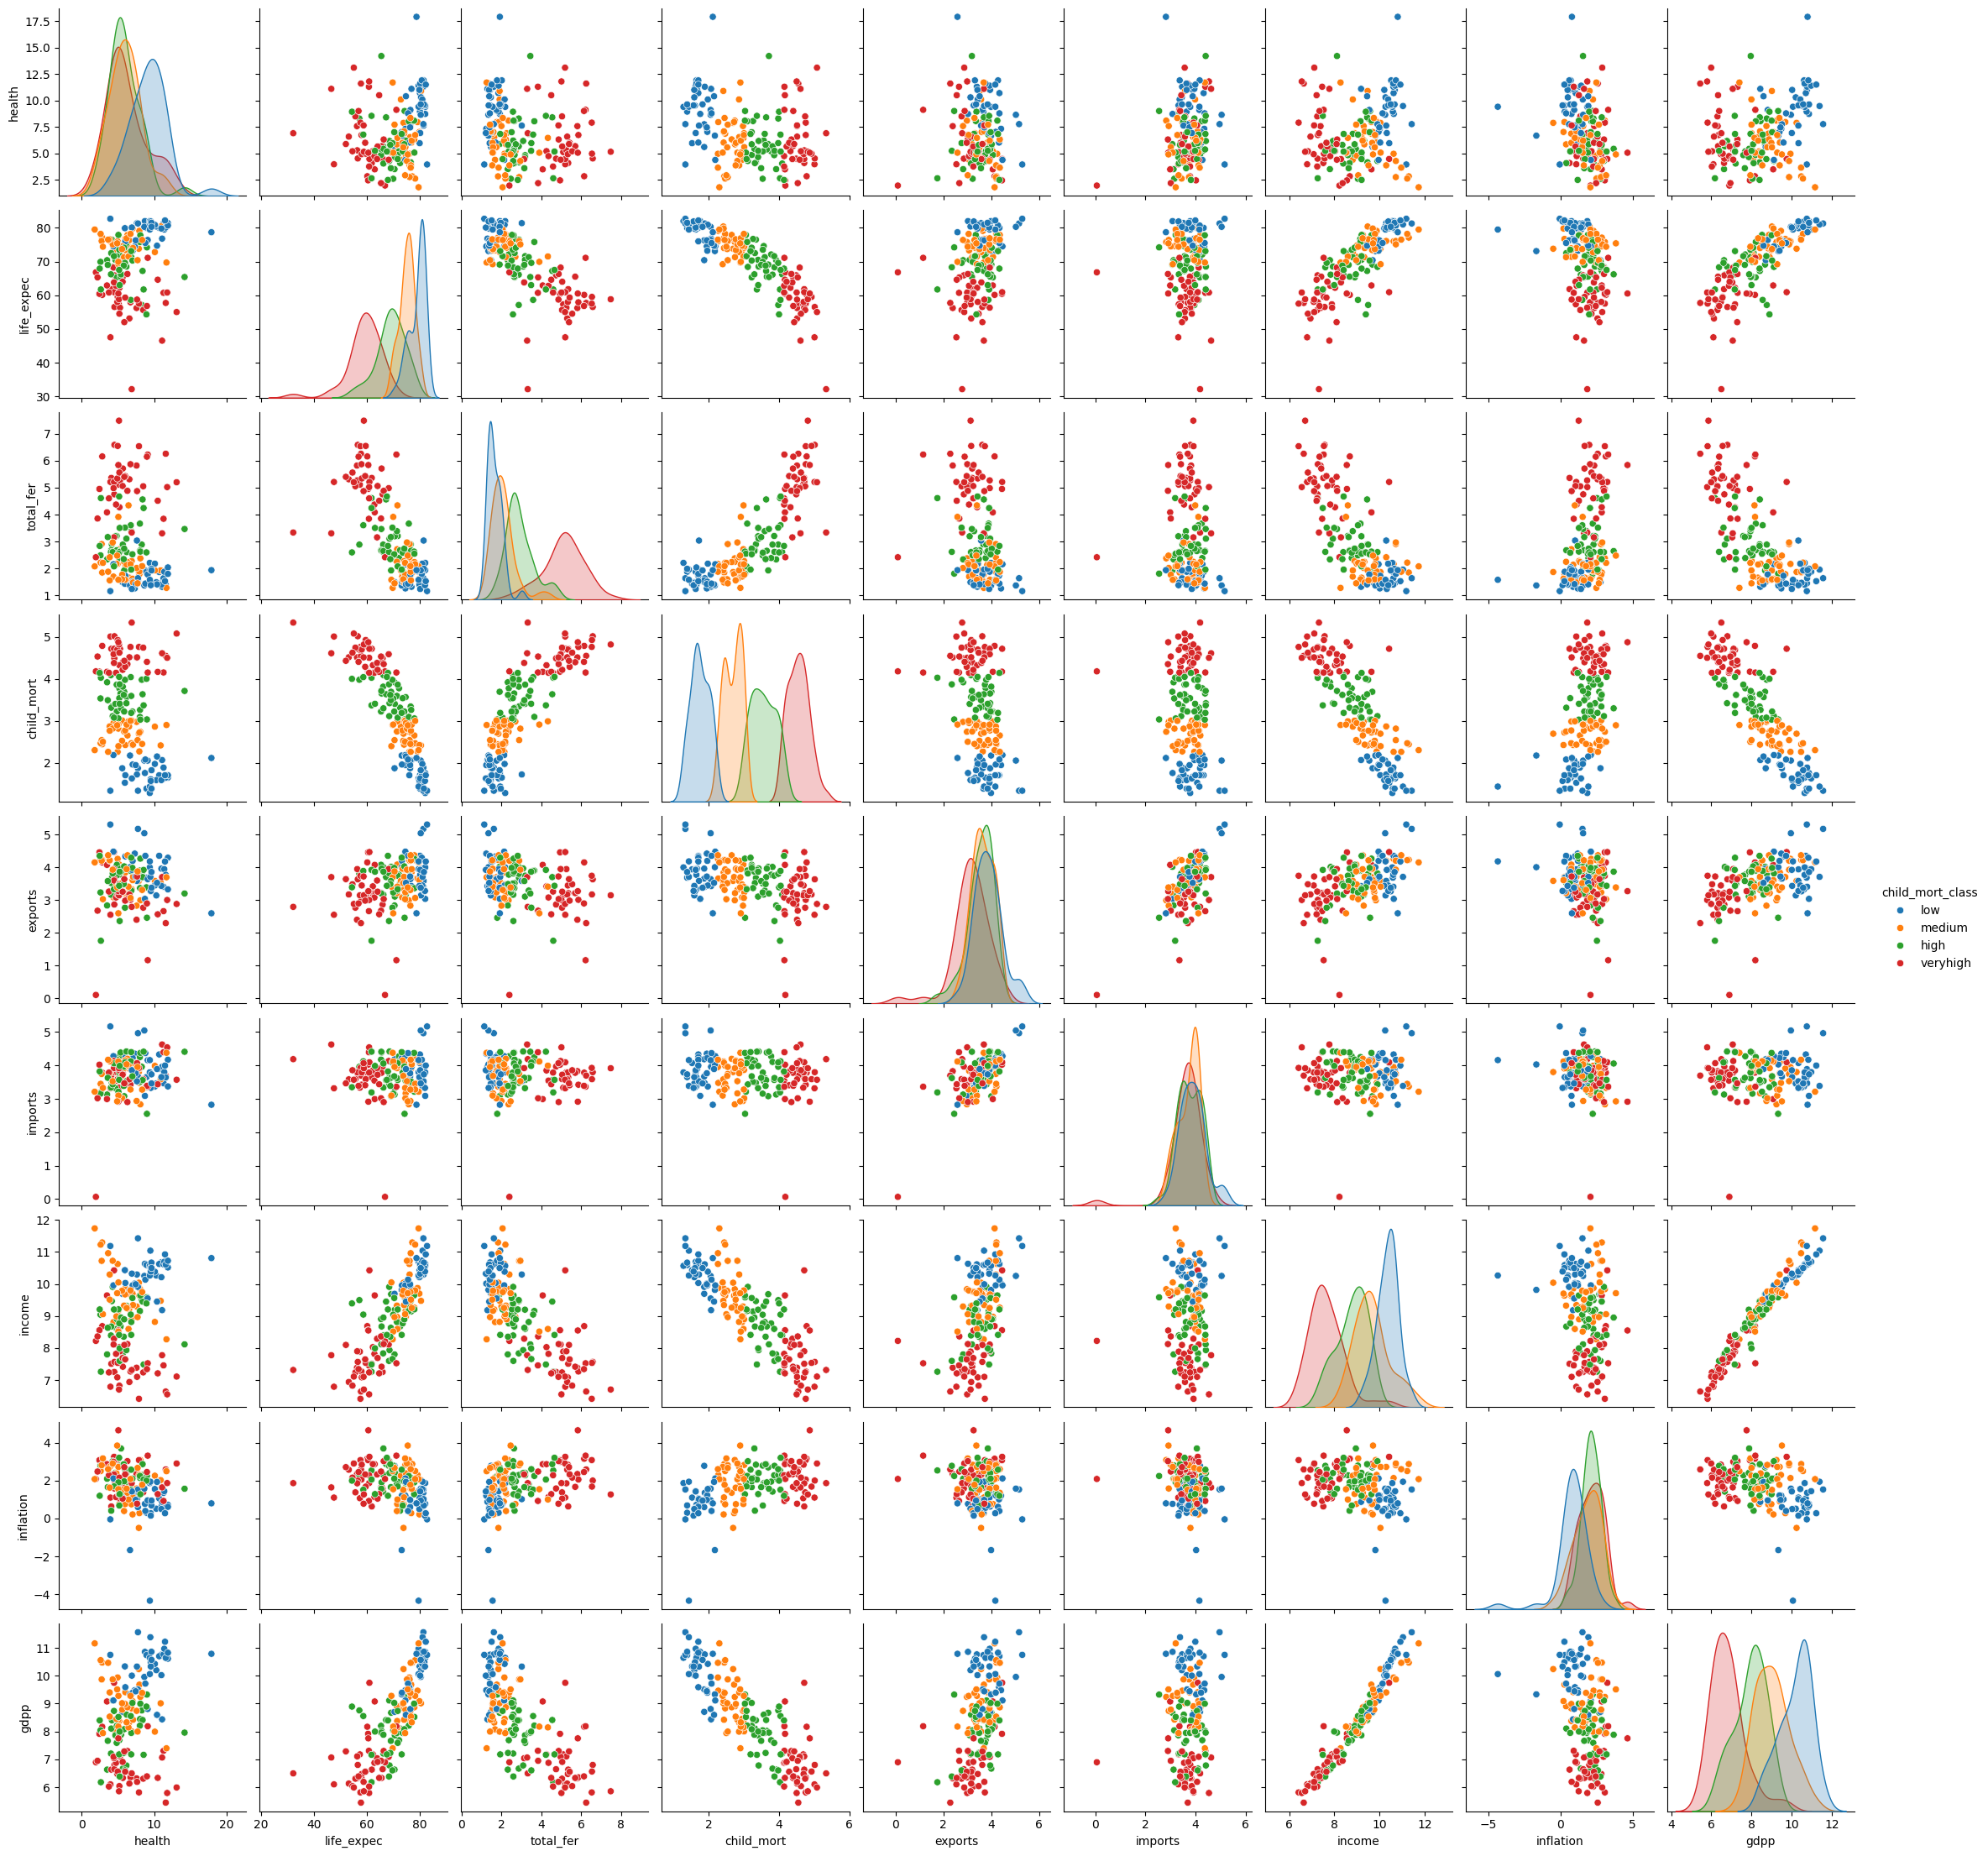

In [12]:
sns.pairplot(transformed_data, hue="child_mort_class")

In [13]:
data = transformed_data.copy()
data.head()

,health,life_expec,total_fer,child_mort_class,child_mort,exports,imports,income,inflation,gdpp
0,7.58,56.2,5.82,veryhigh,4.513055,2.397895,3.826465,7.384610,2.345645,6.317165
1,6.55,76.3,1.65,medium,2.867899,3.367296,3.903991,9.203416,1.702928,8.316545
2,4.17,76.5,2.89,high,3.342862,3.673766,3.478158,9.465060,2.839078,8.403128
3,2.85,60.1,6.16,veryhigh,4.787492,4.147885,3.781914,8.682877,3.152736,8.169336
4,6.03,76.8,2.13,medium,2.424803,3.839452,4.092677,9.857496,0.891998,9.409273


In [14]:
categories = [['low', 'medium', 'high', 'veryhigh']]
oe = OrdinalEncoder(categories=categories)
data['child_mort_class'] = oe.fit_transform(data[['child_mort_class']])
data.head()

,health,life_expec,total_fer,child_mort_class,child_mort,exports,imports,income,inflation,gdpp
0,7.58,56.2,5.82,3.0,4.513055,2.397895,3.826465,7.384610,2.345645,6.317165
1,6.55,76.3,1.65,1.0,2.867899,3.367296,3.903991,9.203416,1.702928,8.316545
2,4.17,76.5,2.89,2.0,3.342862,3.673766,3.478158,9.465060,2.839078,8.403128
3,2.85,60.1,6.16,3.0,4.787492,4.147885,3.781914,8.682877,3.152736,8.169336
4,6.03,76.8,2.13,1.0,2.424803,3.839452,4.092677,9.857496,0.891998,9.409273


### Unsupervised Learning Models

In [15]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

#### `Kernel PCA`

In [16]:
X = data[numerical_columns]
y = data.child_mort_class

In [17]:
ss = StandardScaler()
ss_data = ss.fit_transform(X)

In [18]:
kernel_pca = KernelPCA(kernel="rbf" ,fit_inverse_transform=True, alpha=0.1)
kernel_score=kernel_pca.fit_transform(ss_data)

In [19]:
kernel_pca.eigenvalues_[:5]

array([25.03614589, 15.33285823,  9.4217296 ,  7.51956676,  4.96893681])

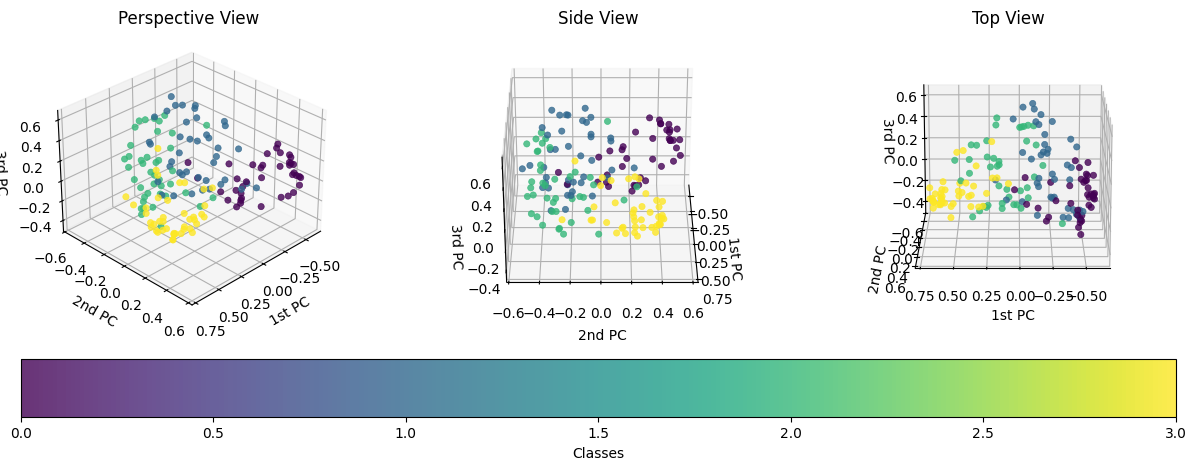

In [20]:
fig = plt.figure(figsize=(15, 5))

angles = [(30, 45), (30, 0), (15, 90)]
titles = ['Perspective View', 'Side View', 'Top View']

for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    sc = ax.scatter(kernel_score[:, 0], kernel_score[:, 1], kernel_score[:, 2], 
                    c=y, cmap='viridis', linewidth=0.5, alpha=0.8)
    
    ax.set_xlabel('1st PC')
    ax.set_ylabel('2nd PC')
    ax.set_zlabel('3rd PC')
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(titles[i-1])

cbar = fig.colorbar(sc, ax=fig.axes, orientation='horizontal', pad=0.1)
cbar.set_label('Classes')

plt.show()

#### `PCA`

In [21]:
pca = PCA()
score_pca = pca.fit_transform(ss_data)

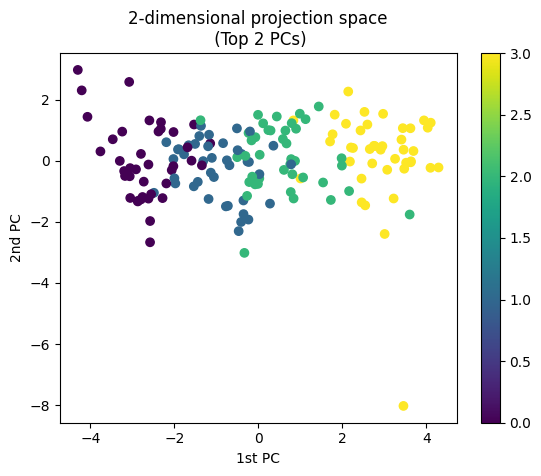

In [22]:
fig, ax = plt.subplots()
sc=ax.scatter(score_pca[:,0],score_pca[:,1] ,c=y,cmap='viridis')
fig.colorbar(sc, orientation='vertical')
ax.set_title('2-dimensional projection space\n (Top 2 PCs)')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

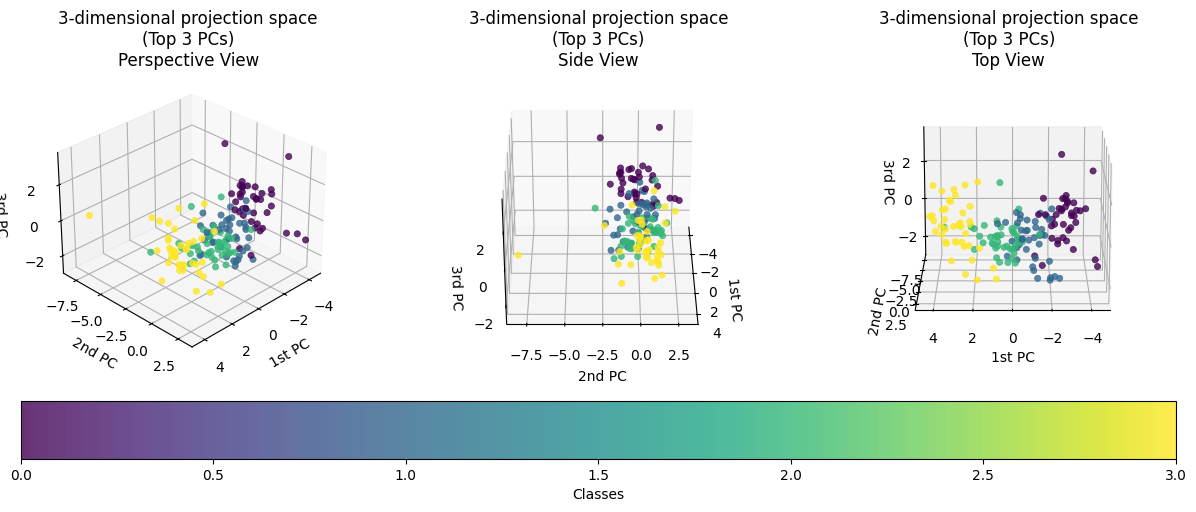

In [23]:
fig = plt.figure(figsize=(15, 5))

angles = [(30, 45), (30, 0), (15, 90)]
titles = ['Perspective View', 'Side View', 'Top View']

for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    sc = ax.scatter(score_pca[:, 0], score_pca[:, 1], score_pca[:, 2], 
                    c=y, cmap='viridis', linewidth=0.5, alpha=0.8)
    
    ax.set_xlabel('1st PC')
    ax.set_ylabel('2nd PC')
    ax.set_zlabel('3rd PC')
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f'3-dimensional projection space\n(Top 3 PCs)\n{titles[i-1]}')

cbar = fig.colorbar(sc, ax=fig.axes, orientation='horizontal', pad=0.1)
cbar.set_label('Classes')

plt.show()

#### `Mean Shift`

In [24]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [25]:
bandwidth = estimate_bandwidth(ss_data)
ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
ms.fit(ss_data)

c:\Users\EAS Consulting\Documents\PythonProjects\CourseraScripts\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\EAS Consulting\Documents\PythonProjects\CourseraScripts\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


MeanShift(bandwidth=np.float64(2.999397604014611), bin_seeding=True)

In [26]:
data['cluster']=ms.labels_

In [27]:
data.groupby('cluster').mean().sort_values(by=['child_mort_class'], ascending=False)

,health,life_expec,total_fer,child_mort_class,child_mort,exports,imports,income,inflation,gdpp
cluster,,,,,,,,,,
1,1.970000,66.800000,2.410000,3.000000,4.180522,0.103459,0.063820,8.221748,2.084429,6.896694
2,7.423500,57.500000,5.532000,2.950000,4.625373,2.800632,3.576144,7.230536,2.356635,6.417699
0,6.726643,72.137857,2.637214,1.335714,2.962386,3.663643,3.785355,9.342920,1.733175,8.744337
3,8.045000,76.300000,1.465000,0.000000,1.804918,4.090428,4.092228,10.039699,-3.007060,9.696590


In [28]:
data.groupby("child_mort_class")["cluster"].unique()

child_mort_class
0.0       [0, 3]
1.0          [0]
2.0       [0, 2]
3.0    [2, 0, 1]
Name: cluster, dtype: object

In [29]:
data.groupby("cluster")["child_mort_class"].unique()

cluster
0    [1.0, 2.0, 3.0, 0.0]
1                   [3.0]
2              [3.0, 2.0]
3                   [0.0]
Name: child_mort_class, dtype: object

#### DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

In [31]:
two_pca = score_pca[:,:2]

In [32]:
cluster = DBSCAN(eps = 1, min_samples = 20)
cluster.fit(two_pca)
print(len(set(cluster.labels_)-{-1}))

2


In [33]:
print(f"{(cluster.labels_ == -1).sum()/len(cluster.labels_)*100}%")

15.950920245398773%


C:\Users\EAS Consulting\AppData\Local\Temp\ipykernel_18880\3037534992.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('brg', n_labels)


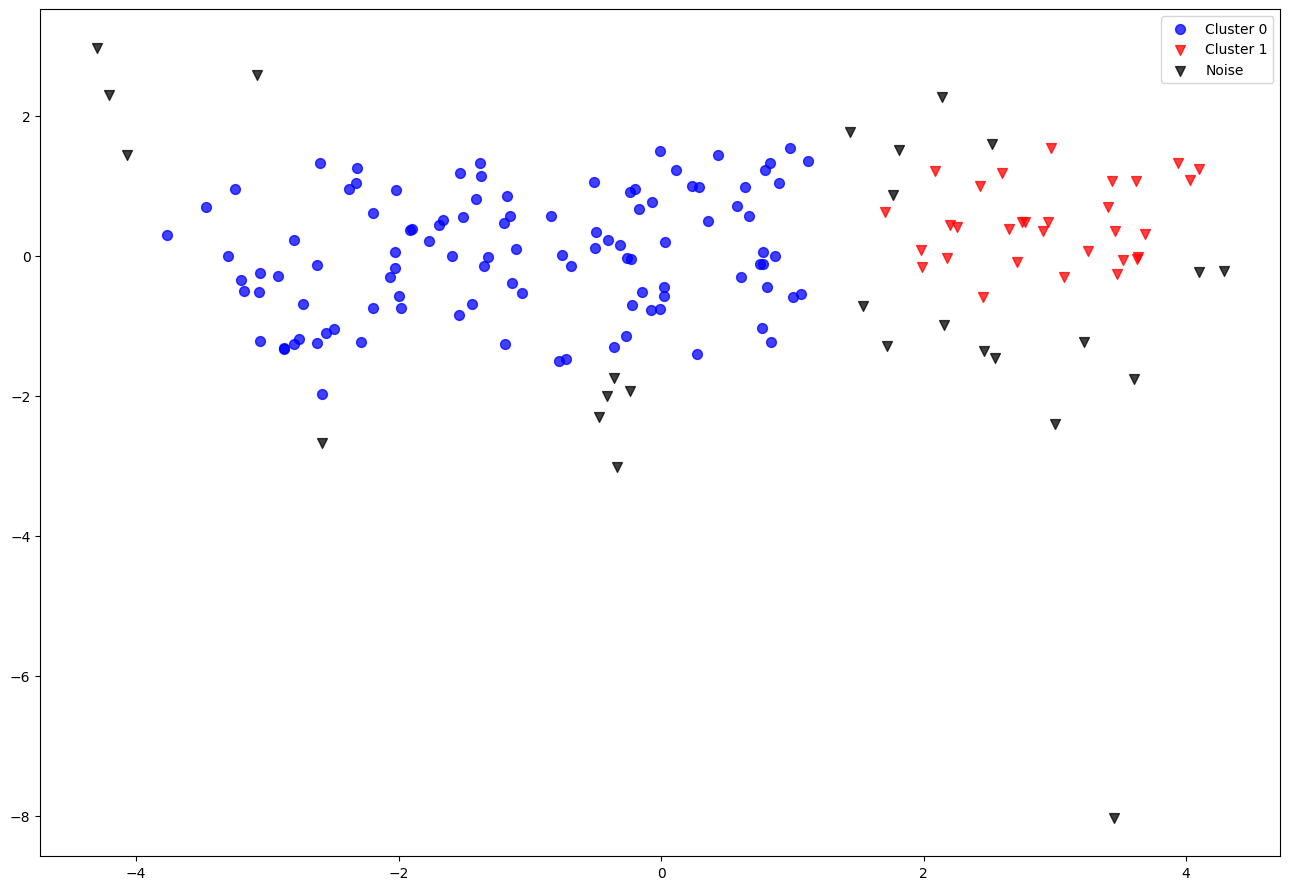

In [40]:
plt.rcParams['figure.figsize'] = (16,11)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        two_pca[:,0][cluster.labels_ == l],
        two_pca[:,1][cluster.labels_ == l],
        c=[cmap(l) if l >= 0 else 'Black'],
        marker='ov'[l%2],
        alpha=0.75,
        s=50,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

### Best Unsupervised model

- Out of the two unsupervised models (Mean Shift & DBSCAN) I can conclude that the best one finding the amount of clusters of the data was the Mean Shift. This model found exactly the 4 clusters that I defined as "low", "medium", "high", "very high" mortality rates with the help of the statistical quartiles.
- Also, DBSCAN did not perform well in finding the clusters since by using our two Principal Components the no clusters' shape were identifiable, and since all the points were pretty bulked toghether it was very difficult for the DBSCAN to distinguish any cluster densities.

### Key Findings
- When it comes to the Principal Components using the KernelPCA we could appreciate in the 3D plot that the variance was very dispersed accross the three principal components, but it might be possible to correctly separate the points by using a SVM if needed.
- For the normal PCA approach it could be appreciated in the 2D&3D plots that throughout the 1st and 2nd PCs the data distribution was clear and the clusters could be easily identified by a classifying method incurring in a little bit of misclassification where the clusters meet each other.
- Although the Mean Shift model did find 4 clusters it did little to populate the clusters with a single class. In the statistical analysis we can appreciate that the Cluster0 had data from all the 4 original clusters, then Cluster1 had data from only one cluster, but this cannot be counted as a success since that cluster's data was spread out among 3 of the calculated clusters, furthermore, the Cluster2 had information from 2 clusters, and the Cluster3 had information from only one cluster, but fell in the same problem as the Cluster1.
- Finally, the DBSCAN was not an appropriate model to use in this clustering excercise since the data from the 2 Principal Components that were used to train the model did not have clear divisions or enough difference in densities for the algorithm to detect a change in cluster.

### Possible flaws in the models & further plans of action
- The data distribution correction could be improved by applying algorithms that focus on negatively skewed data and not only log or log1p for positive skewed data.
- It's possible that for better visualizing the clusters in the data a T-Distributed Stochastic Neighbor Embedding (TSNE) could be used, this would help since it's an appropriate model for visualizing high-dimensional data that's clumped up together.
- The search for clusters could be attempted by training the models with a different combination of PCAs calculated.
- Also, I believe that with some fine tuning and metrics some of these models could be crucial in the application of Regression and Classification methods for better results.
- Finally, it could be interesting to try other Scaling approaches like the MinMaxScaler and observe how the models behave to such modifications.